In [1]:
import numpy as np
from scipy.special import erf
import matplotlib.pyplot as plt 
from datetime import date
import scipy.stats as sps

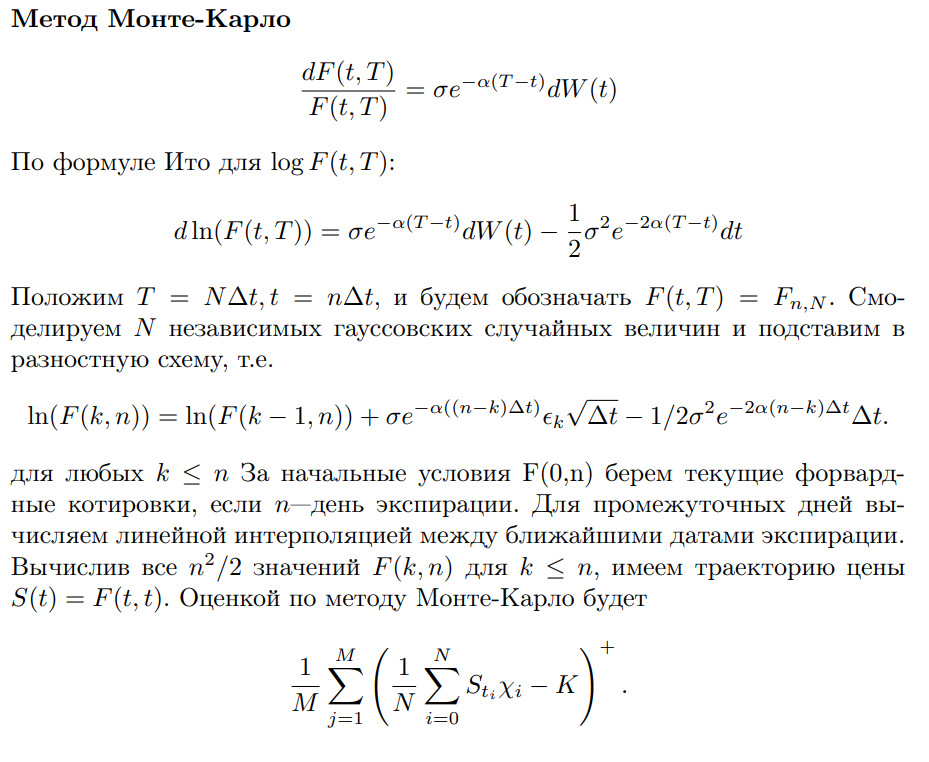

In [32]:
def getConfidenceInterval(optionPrices, confidence):
    return sps.t.interval(
        confidence, 
        len(optionPrices)-1, 
        loc=np.mean(optionPrices), 
        scale=sps.sem(optionPrices)
    )

def generatePaths(pathsNumber, stepsNumber, dt):
    return sps.norm.rvs(0, dt**0.5, size=(stepsNumber, pathsNumber))

def getLogForwardIncrements(alpha, sigma, dt, dW):
    times = np.ones(dW.shape).cumsum(axis=1) * dt
    return sigma * np.exp(-alpha * times) * dW \
    - sigma**2 / 2 * np.exp(-2 * alpha * times) * dt

def getForwardPrices(pathsNumber, stepsNumber, alpha, sigma, tenor):
    dt = tenor / stepsNumber
    dW = generatePaths(pathsNumber, stepsNumber, dt) 
    dLogF = getLogForwardIncrements(alpha, sigma, dt, dW)
    LogF = dLogF.cumsum(axis=0) + np.log(S_0)
    return np.exp(LogF)

def getAveragePrice(
    pathsNumber, stepsNumber, S_0, alpha, sigma, tenor
):
    F = getForwardPrices(pathsNumber, stepsNumber, alpha, sigma, tenor)
#     weights = S_0  * np.exp(alpha * tenor) / F / pathsNumber
#     weights = S_0 / stepsNumber / F[-1]
    weights = S_0  * np.exp(alpha * tenor) / F / pathsNumber  
    return (weights * F).sum(axis=0)

def getPutIntrinsicValue(averagePrice, K):
    return K - averagePrice

def getCallIntrinsicValue(averagePrice, K):
    return averagePrice - K

def getOptionPayoff(intrinsicValue):
    return np.maximum(intrinsicValue, 0)

def getOptionPrice(
    pathsNumber, stepsNumber, S_0, K, alpha, sigma, tenor
):
    averagePrice = getAveragePrice(
        pathsNumber, stepsNumber, S_0, alpha, sigma, tenor
    )
    putIntrinsicValue = getPutIntrinsicValue(averagePrice, K)
    return getOptionPayoff(putIntrinsicValue)

def getMonteCarloOptionPrice(
    pathsNumber, stepsNumber, S_0, K, alpha, sigma, tenor, confidence
):
    putPrices = getOptionPrice(
        pathsNumber, stepsNumber, S_0, K, alpha, sigma, tenor
    )
    return putPrices.mean(), getConfidenceInterval(putPrices, confidence)

                                                   
                                                   
                                                   
                                                   
def plotPriceIteration(
    stepsNumber, S_0, K, alpha, sigma, tenor, 
    confidence, iterationStep, maxIterationNumber, aproximationPrice=None
):
    iterationsNumbers = np.arange(0, maxIterationNumber + iterationStep, iterationStep)[1:]
    putPrices = []
    lowerBounds = []
    upperBounds = []
                                                   
    for iterationsNumber in iterationsNumbers:
        price, interval = getMonteCarloOptionPrice(
                iterationsNumber, stepsNumber, S_0, K, alpha, sigma, tenor, confidence
        )                                           
        putPrices.append(price)
        lowerBounds.append(interval[0])
        upperBounds.append(interval[1])
    
    plt.figure(figsize=(14, 8))
    plt.plot(iterationsNumbers, putPrices)
    plt.plot(iterationsNumbers, lowerBounds)
    plt.plot(iterationsNumbers, upperBounds)
    
    if aproximationPrice:
        plt.axhline(y=aproximationPrice, color='black')#, linestyle='--', linewidth=5)
        
    plt.title('Asian put option price over path number in Monte Carlo')
    plt.xlabel('Paths number')
    plt.ylabel('Put price')

def plotPriceStrike(pathsNumber, stepsNumber, S_0, alpha, sigma, tenor, aproximationPrice):
    pass

def plotPaths(pathsNumber, stepsNumber, tenor, strike=None):
    paths = getForwardPrices(pathsNumber, stepsNumber, alpha, sigma, tenor)
    plt.figure(figsize=(14, 8))
    plt.plot(range(stepsNumber), paths)
    
    if strike:
        plt.axhline(y=strike, color='black', linestyle='--', linewidth=5)
        
    plt.title('Stock paths')
    plt.xlabel('Step')
    plt.ylabel('Stock value')


In [33]:
sigma = 0.242
alpha = 0.05
S_0 = 68.01
K = 70
tenor = 1

pathsNumber = 10**4
stepsNumber = 100

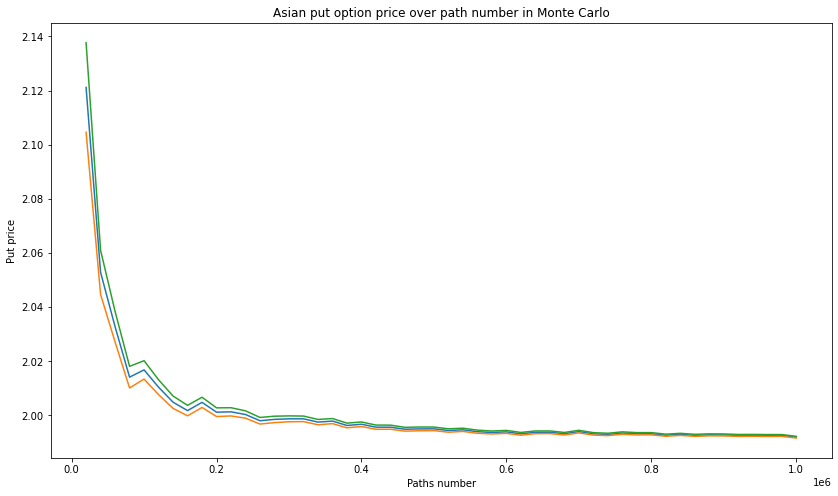

In [38]:
stepsNumber = 100
iterationStep = 2 * 10**4
maxIterationNumber = 10**6
approximationPrice = 3.45
confidence = 0.90

plotPriceIteration(
    stepsNumber, S_0,  K, alpha, sigma, tenor, confidence, iterationStep, maxIterationNumber
)

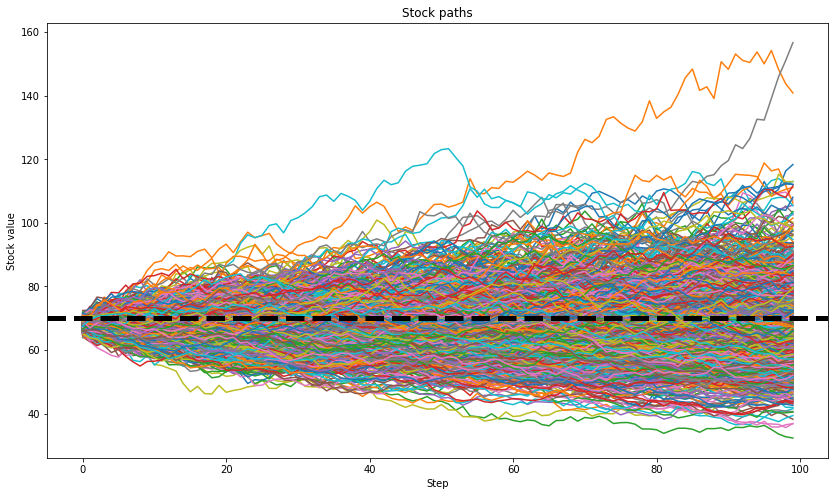

In [36]:
plotPaths(1000, stepsNumber, tenor, K)